In [3]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split 

from sklearn import metrics 

from sklearn.model_selection import cross_val_score #this uses stratified K-fold cross validation for classification and normal K-fold for regression 

from sklearn.preprocessing import StandardScaler

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 

In [4]:
dp = r"C:\Users\anany\OneDrive\Desktop\generated_data_final.csv"
df = pd.read_csv(dp)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,3901,21,Male,Shirt,Footwear,101,California,XL,Black,Summer,4.0,Yes,Standard,Yes,No,36,Cash,Annually
1,3902,23,Male,Jeans,Accessories,105,Florida,M,White,Fall,3.1,No,Free Shipping,No,No,16,Credit Card,Weekly
2,3903,55,Female,Sneakers,Clothing,50,California,L,Black,Summer,4.9,Yes,Standard,No,No,25,Credit Card,Fortnightly
3,3904,21,Female,T-shirt,Clothing,195,Illinois,L,Black,Summer,3.3,Yes,Free Shipping,Yes,No,0,Cash,Quarterly
4,3905,24,Female,Jeans,Accessories,22,New York,XL,Red,Fall,2.9,No,Standard,Yes,No,49,Venmo,Weekly


c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

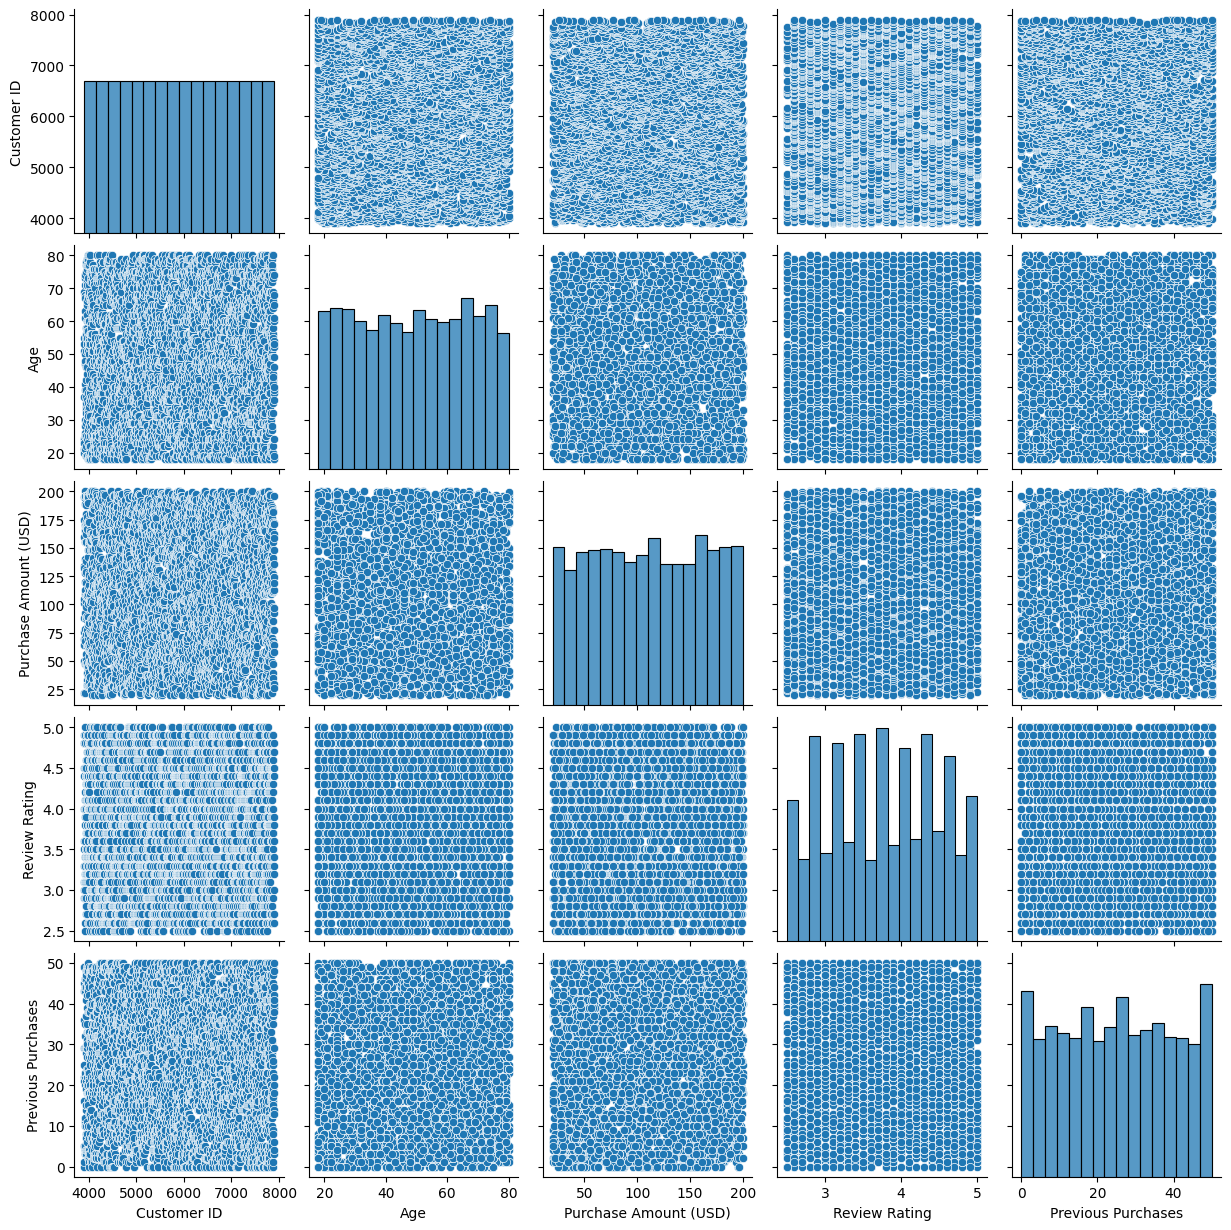

In [4]:
sns.pairplot(df)

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_columns = df.select_dtypes(exclude=['number', 'bool']).columns.tolist()

# For binary or ordinal categorical variables, use LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# For nominal categorical variables, use OneHotEncoder
nominal_cols = df.select_dtypes(exclude=['number', 'bool']).columns.tolist()
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(df[nominal_cols])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(nominal_cols))
df = pd.concat([df.drop(columns=nominal_cols), onehot_encoded_df], axis=1)

# Drop rows with missing values
df.dropna(inplace=True)

# Display the first few rows of the cleaned and encoded DataFrame
print(df.head())

   Customer ID  Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0         3901   21       1               3         2                    101   
1         3902   23       1               2         0                    105   
2         3903   55       0               4         1                     50   
3         3904   21       0               5         1                    195   
4         3905   24       0               2         0                     22   

   Location  Size  Color  Season  Review Rating  Subscription Status  \
0         0     3      0       2            4.0                    1   
1         1     1      4       0            3.1                    0   
2         0     0      0       2            4.9                    1   
3         2     0      0       2            3.3                    1   
4         3     3      3       0            2.9                    0   

   Shipping Type  Discount Applied  Promo Code Used  Previous Purchases  \
0          

c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
from sklearn.preprocessing import MinMaxScaler
# Standardize numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Normalize the entire DataFrame
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Drop rows with missing values
df.dropna(inplace=True)

# Display the first few rows of the cleaned, encoded, standardized, and normalized DataFrame
print(df.head())

   Customer ID       Age  Gender  Item Purchased  Category  \
0      0.00000  0.048387     1.0             0.6       1.0   
1      0.00025  0.080645     1.0             0.4       0.0   
2      0.00050  0.596774     0.0             0.8       0.5   
3      0.00075  0.048387     0.0             1.0       0.5   
4      0.00100  0.096774     0.0             0.4       0.0   

   Purchase Amount (USD)  Location      Size  Color    Season  Review Rating  \
0               0.450000      0.00  1.000000   0.00  0.666667           0.60   
1               0.472222      0.25  0.333333   1.00  0.000000           0.24   
2               0.166667      0.00  0.000000   0.00  0.666667           0.96   
3               0.972222      0.50  0.000000   0.00  0.666667           0.32   
4               0.011111      0.75  1.000000   0.75  0.000000           0.16   

   Subscription Status  Shipping Type  Discount Applied  Promo Code Used  \
0                  1.0            1.0               1.0              0

c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_catego

Cluster
3    828
4    813
1    796
0    794
2    769
Name: count, dtype: int64
               Age  Purchase Amount (USD)  Review Rating  \
Cluster                                                    
0        54.105793             161.206549       3.657305   
1        65.951005             114.471106       3.647613   
2        59.400520              58.953186       3.932640   
3        34.230676             120.743961       4.466667   
4        32.185732              96.340713       3.064453   

         Frequency of Purchases  
Cluster                          
0                      0.714106  
1                      3.340452  
2                      0.986996  
3                      2.638889  
4                      2.216482  
Cluster  Gender
0        0         406
         1         388
1        0         406
         1         390
2        0         394
         1         375
3        0         418
         1         410
4        0         385
         1         428
dtype: int64
Clu

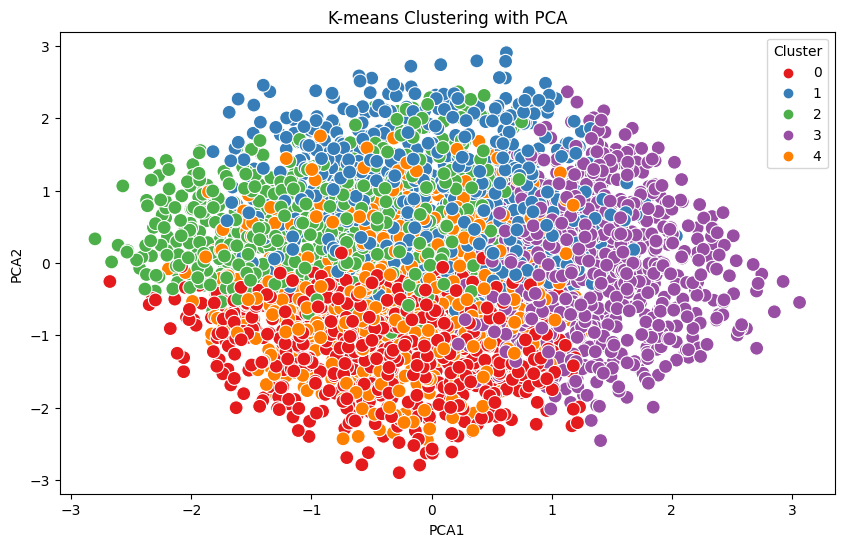

In [16]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Frequency of Purchases']

# Standardize the selected features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply K-means clustering with the optimal number of clusters
optimal_k = 5  # You can determine the optimal number of clusters using the Elbow method as shown before
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the cluster assignments
print(df['Cluster'].value_counts())

# Optionally, you can analyze the clusters by grouping and aggregating data
cluster_analysis = df.groupby('Cluster')[features].mean()
print(cluster_analysis)

# If you want to see the distribution of clusters across different categorical variables like 'Gender', 'Category', etc.
categorical_columns = ['Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Payment Method']
for col in categorical_columns:
    print(df.groupby(['Cluster', col]).size())


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Combine PCA components with cluster assignments
df_pca['Cluster'] = df['Cluster']

# Plotting clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1', s=100)
plt.title('K-means Clustering with PCA')
plt.show()



In [ ]:
rep = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.82      0.90        11
           2       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



***************************************************************************************
USING K-FOLD CROSS VALIDATION (USING CROSS_VAL_SCORE FROM SKLEARN) AND THEN TRAINING MODEL WITH THE BEST VALUE OF K
*****************************************************************************************

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

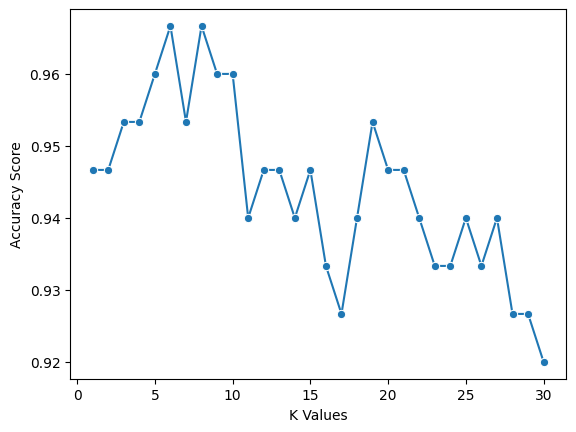

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")



In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
yk_pred = knn2.predict(X_test)


In [ ]:
rep_k = metrics.classification_report(y_true=y_test, y_pred=yk_pred)
print(rep_k)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Looking at the test values and predicted values side by side

In [ ]:
yt = pd.DataFrame(y_test, columns=['actual value'])
res = pd.concat([yt.reset_index(drop=True), pd.DataFrame(yk_pred, columns=['predicted value'])], axis=1)
res

,actual value,predicted value
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0
